In [1]:
import networkx as nx
import matplotlib.pyplot as plt

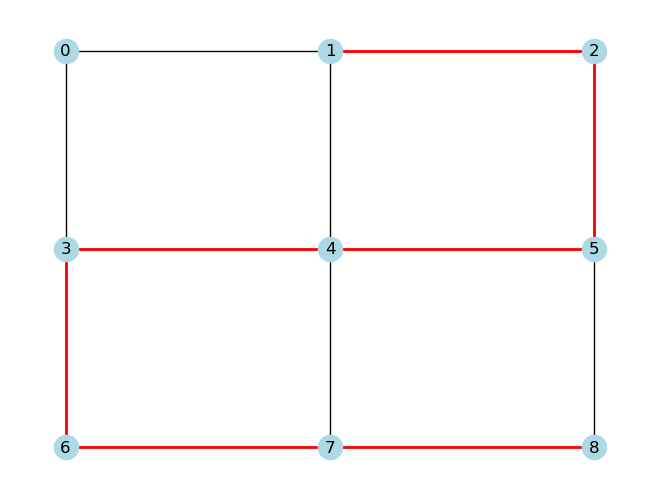

In [9]:
# Create a 2D grid graph with integer node indices
def create_grid(m, n):
    G = nx.Graph()
    node_mapping = {}  # Map (row, col) to a unique integer
    counter = 0

    for i in range(m):
        for j in range(n):
            node_mapping[(i, j)] = counter
            counter += 1

    for i in range(m):
        for j in range(n):
            if i > 0:
                G.add_edge(node_mapping[(i, j)], node_mapping[(i - 1, j)], weight=1)
            if j > 0:
                G.add_edge(node_mapping[(i, j)], node_mapping[(i, j - 1)], weight=1)
    
    return G, node_mapping

# Create a 3x3 grid graph
G, node_mapping = create_grid(3, 3)

od_flows = {
    (1, 8): 190,
    (2, 6): 10,
}

routes = [
    (1, 2, 5, 8, 7, 6),
    (1, 2, 5, 4, 3, 6, 7, 8),
]

possible_fleet_compositions = [
    (1, 1),
    (2, 0),
    (0, 2),
    (2, 1),
    (1, 2),
    (0, 3),
    (3, 0),
]

# Generate positions for nodes (2D grid layout)
pos = {node_mapping[(x, y)]: (y, -x) for x, y in node_mapping.keys()}  # Flip y-coordinates for a natural grid look

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue')

# Highlight the first route
route = routes[1]
edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)

# Display the plot
plt.show()


In [10]:
import yaml
from pathlib import Path

def write_yaml(
    fleet_composition: str,
    avg_travel_time: float,
    output_file_path: Path,
    avg_discomfort_level: float,
    avg_transfers: float,
    avg_hops: float,
    total_emissions: float,
    overwrite: bool = False
):
    # Check if file exists and load existing data if overwrite is False
    if output_file_path.exists():
        with output_file_path.open("r") as file:
            data = yaml.safe_load(file)
    else:
        data = {}

    # Initialize the YAML structure if file is new or overwrite is True
    if overwrite or "F" not in data or "R" not in data:
        data = {
            "F": [
                "satisfied_demand"
            ],
            "R": [
                "`fleet",  # Fixed fleet composition
                "s",  # avg_travel_time
                "Reals",  # avg_discomfort_level
                "Reals",  # avg_transfers
                "Reals",  # avg_hops
                "kg/year",  # total_emissions
            ],
            "implementations": {}
        }

    # Get the current implementation number and add the new entry
    implementations = data.get("implementations", {})
    model_number = len(implementations) + 1
    model_name = f"modelsub{model_number}"

    # Add the new implementation
    implementations[model_name] = {
        "f_max": [
            f"satisfied_demand: demand_1_8_10__2_6_190"
        ],
        "r_min": [
            f"`fleet: {fleet_composition}",
            f"{avg_travel_time} s",
            f"{avg_discomfort} Reals",
            f"{avg_transfers} Reals",
            f"{avg_hops} Reals",
            f"{total_emissions} kg/year"
        ]
    }

    data["implementations"] = implementations

    # Write the updated YAML file
    with output_file_path.open("w") as file:
        yaml.dump(data, file, default_flow_style=False)

